In [402]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [403]:
#Read raw file
df=pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


# Data Cleaning

In [404]:
# check missing value
missing_values = df.isnull().sum()
print("Missing values before cleaning:\n", missing_values)

Missing values before cleaning:
 User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64


In [405]:
# Check missing value for Churned
churned_data = df[df['Churned'] == 1]
missing_values_churned = churned_data[['Date_of_Churn', 'Reason_for_Churn']].isnull().sum()
print("Missing values when Churned=1:\n", missing_values_churned)

Missing values when Churned=1:
 Date_of_Churn       0
Reason_for_Churn    0
dtype: int64


In [406]:
#Convert subscription start date to datetime format
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])

# Define the current date
current_date = datetime.now()

# Create columns
df['Subscription_Months'] = ((current_date - df['Subscription_Start_Date']) / pd.Timedelta(days=30)).astype(int)
df['Total_Hours_Watched'] = df['Monthly_Hours_Watched'] * df['Subscription_Months']
df['Total_Visits'] = df['Total_Hours_Watched'] / df ['Average_Session_Length']
df['Average_Monthly_Visits'] = df['Total_Visits'] / df['Subscription_Months']

# 定义年龄范围分类
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70']
df['Age_range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Months,Total_Hours_Watched,Total_Visits,Average_Monthly_Visits,Age_range
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,...,1023,5,0,NaN,NaN,48,1512.631330,1264.993488,26.354031,50-60
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,...,1076,1,0,NaN,NaN,3,14.946832,18.475650,6.158550,60-70
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,...,1095,2,0,NaN,NaN,20,82.299050,71.342931,3.567147,40-50
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,...,1003,1,0,NaN,NaN,29,1747.099777,2866.434936,98.842584,30-40
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,1012,4,0,NaN,NaN,51,240.304614,667.566283,13.089535,60-70


In [407]:
# 设置上限值
upper_limit = 300

df['Average_Monthly_Visits'] = df['Average_Monthly_Visits'].apply(lambda x: x if x <= upper_limit else upper_limit)

print(df['Average_Monthly_Visits'].describe())
print("Max value after replacement:", df['Average_Monthly_Visits'].max())


count    1000.000000
mean       35.127162
std        65.490938
min         0.006491
25%         3.477022
50%         9.973894
75%        31.648585
max       300.000000
Name: Average_Monthly_Visits, dtype: float64
Max value after replacement: 300.0


In [408]:
df_clean = df.drop(columns=['Gender', 'Subscription_Start_Date', 'Monthly_Payment', 'Payment_Method', 'Content_ID'])

df_clean.describe()

,User_ID,Age,Monthly_Hours_Watched,Average_Session_Length,Rating_Given,Churned,Subscription_Months,Total_Hours_Watched,Total_Visits,Average_Monthly_Visits
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,500.500000,44.385000,19.071653,1.893771,3.030000,0.246000,32.289000,603.294235,7.814541e+03,35.127162
std,288.819436,15.321669,19.279140,1.868852,1.422365,0.430894,17.914866,770.322402,1.709158e+05,65.490938
min,1.000000,18.000000,0.041574,0.000486,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.006491
25%,250.750000,31.750000,5.490739,0.548918,2.000000,0.000000,16.000000,104.604898,7.305696e+01,3.477022
50%,500.500000,45.000000,13.361219,1.271808,3.000000,0.000000,33.000000,341.815852,2.615853e+02,9.973894
75%,750.250000,57.000000,26.471636,2.623575,4.000000,0.000000,49.000000,816.388399,9.556349e+02,31.648585
max,1000.000000,70.000000,139.170408,11.417557,5.000000,1.000000,61.000000,6718.592656,5.379438e+06,300.000000


# Analyse the Churned

## 看看跟平台使用时间和次数是否有关？

结论：关系不大

Churned Users Stats:
        Average_Session_Length  Monthly_Hours_Watched  Total_Hours_Watched  \
count              246.000000             246.000000           246.000000   
mean                 1.920114              17.039672           569.796068   
std                  1.841691              17.236483           689.452841   
min                  0.000821               0.041574             0.000000   
25%                  0.641881               5.105890            90.135685   
50%                  1.277379              11.948593           356.957829   
75%                  2.704228              23.618435           724.849671   
max                 11.417557             108.122364          4520.875500   

       Average_Monthly_Visits  
count              246.000000  
mean                32.247019  
std                 64.208104  
min                  0.006491  
25%                  2.874881  
50%                  8.110648  
75%                 26.358080  
max                300.00000

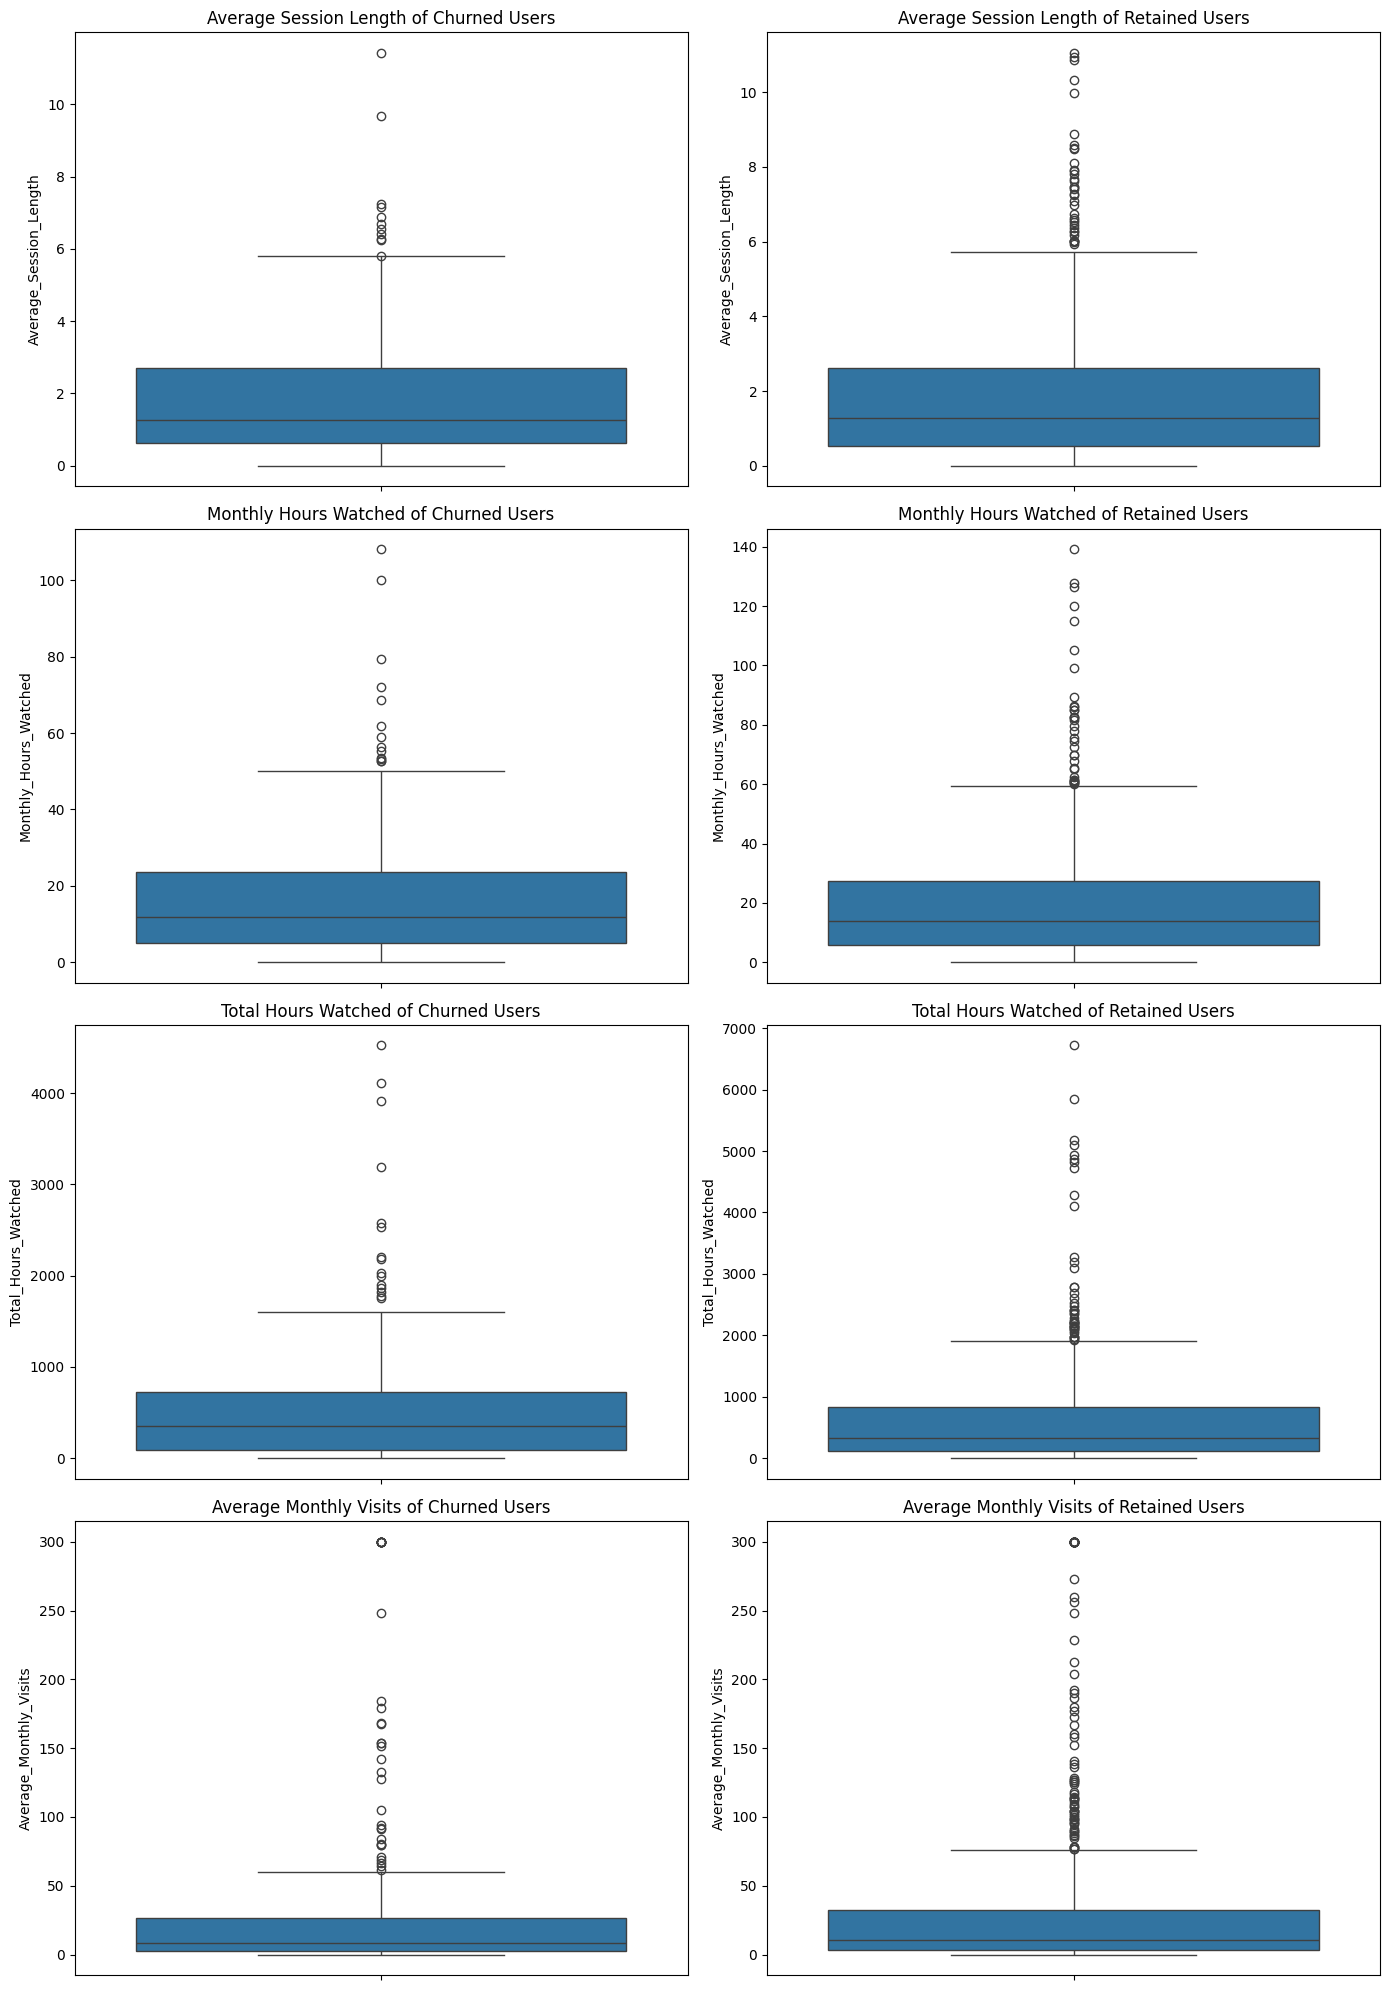

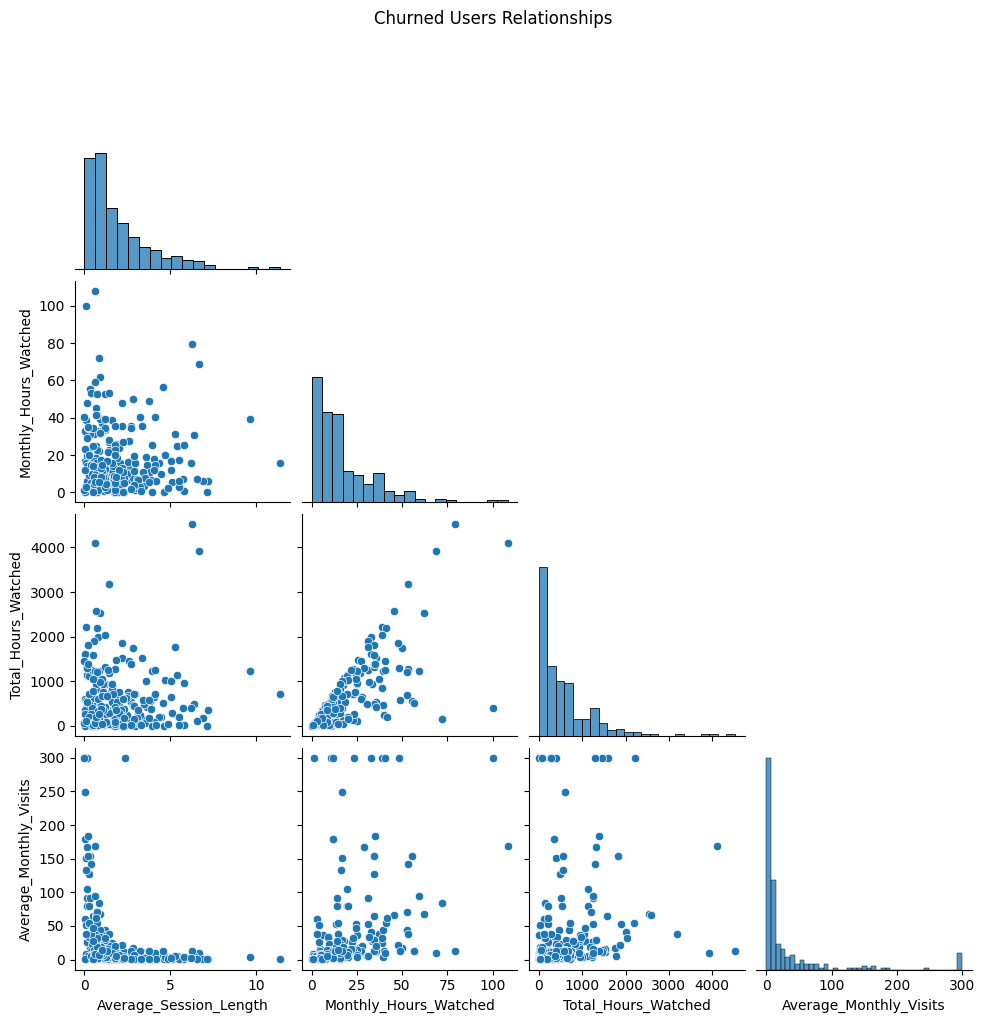

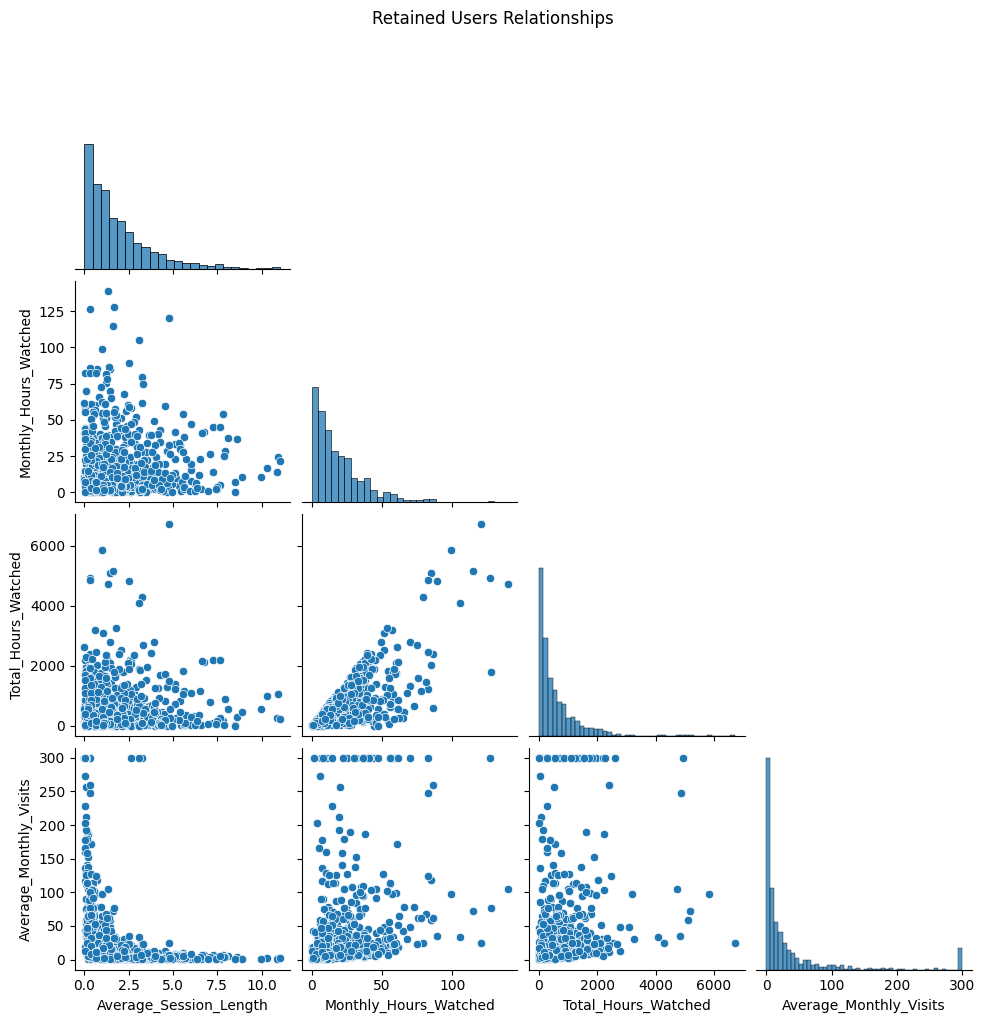

In [409]:
# 筛选出流失的用户和未流失的用户
churned_users = df_clean[df_clean['Churned'] == 1]
retained_users = df_clean[df_clean['Churned'] == 0]

# 描述性统计
churned_stats = churned_users[['Average_Session_Length', 'Monthly_Hours_Watched', 'Total_Hours_Watched', 'Average_Monthly_Visits']].describe()
retained_stats = retained_users[['Average_Session_Length', 'Monthly_Hours_Watched', 'Total_Hours_Watched', 'Average_Monthly_Visits']].describe()

print("Churned Users Stats:\n", churned_stats)
print("\nRetained Users Stats:\n", retained_stats)

# 可视化分析
plt.figure(figsize=(14, 20))

# 箱线图 - 流失用户
plt.subplot(4, 2, 1)
sns.boxplot(y=churned_users['Average_Session_Length'])
plt.title('Average Session Length of Churned Users')

plt.subplot(4, 2, 2)
sns.boxplot(y=retained_users['Average_Session_Length'])
plt.title('Average Session Length of Retained Users')

plt.subplot(4, 2, 3)
sns.boxplot(y=churned_users['Monthly_Hours_Watched'])
plt.title('Monthly Hours Watched of Churned Users')

plt.subplot(4, 2, 4)
sns.boxplot(y=retained_users['Monthly_Hours_Watched'])
plt.title('Monthly Hours Watched of Retained Users')

plt.subplot(4, 2, 5)
sns.boxplot(y=churned_users['Total_Hours_Watched'])
plt.title('Total Hours Watched of Churned Users')

plt.subplot(4, 2, 6)
sns.boxplot(y=retained_users['Total_Hours_Watched'])
plt.title('Total Hours Watched of Retained Users')

plt.subplot(4, 2, 7)
sns.boxplot(y=churned_users['Average_Monthly_Visits'])
plt.title('Average Monthly Visits of Churned Users')

plt.subplot(4, 2, 8)
sns.boxplot(y=retained_users['Average_Monthly_Visits'])
plt.title('Average Monthly Visits of Retained Users')

plt.tight_layout()
plt.show()

# 散点图矩阵 - 流失用户 vs 未流失用户
sns.pairplot(churned_users[['Average_Session_Length', 'Monthly_Hours_Watched', 'Total_Hours_Watched', 'Average_Monthly_Visits']], corner=True)
plt.suptitle('Churned Users Relationships', y=1.02)
plt.show()

sns.pairplot(retained_users[['Average_Session_Length', 'Monthly_Hours_Watched', 'Total_Hours_Watched', 'Average_Monthly_Visits']], corner=True)
plt.suptitle('Retained Users Relationships', y=1.02)
plt.show()

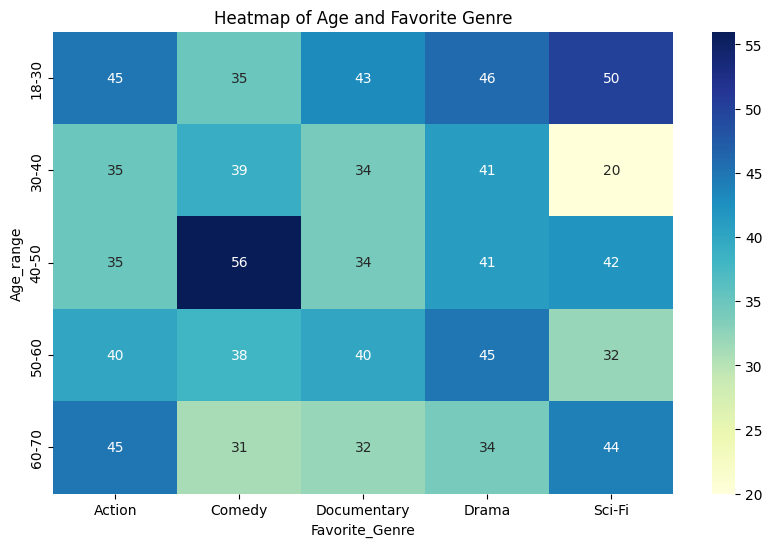

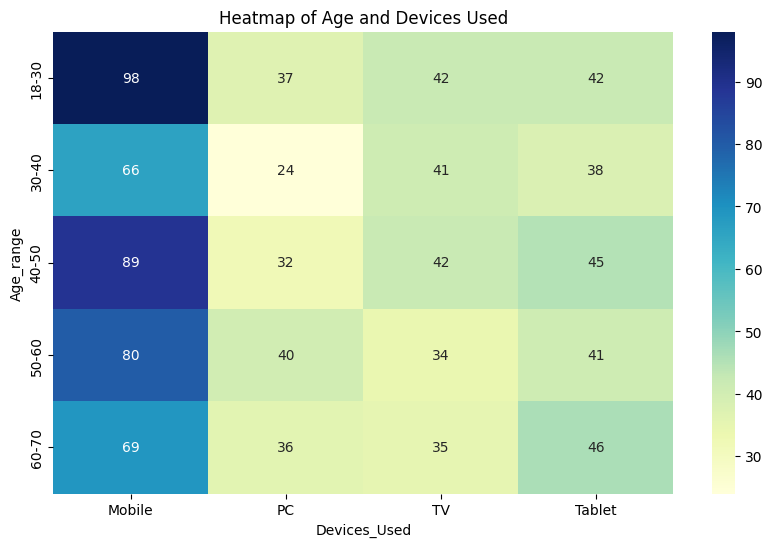

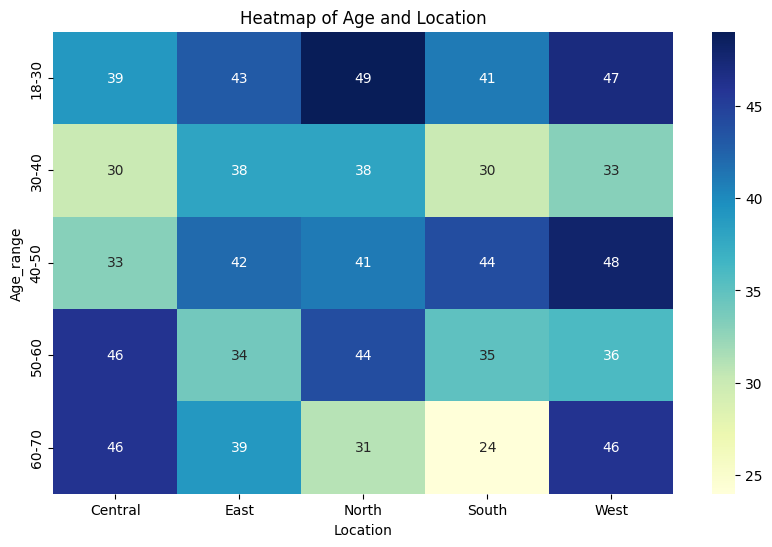

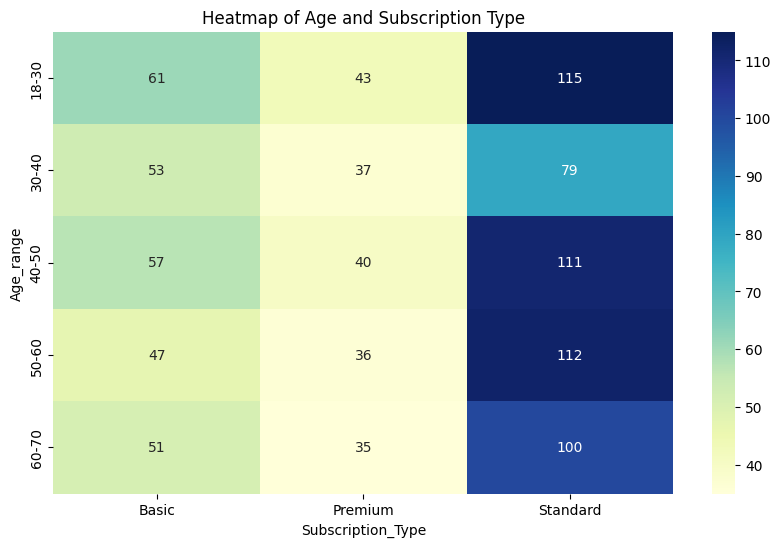

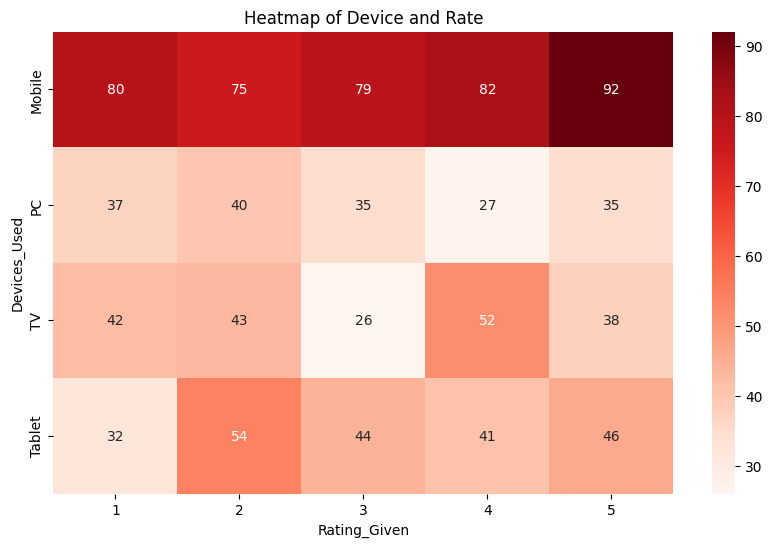

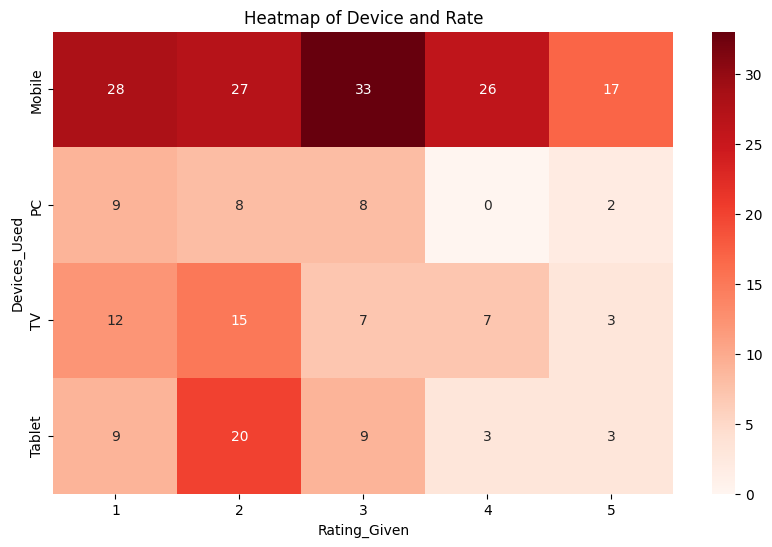

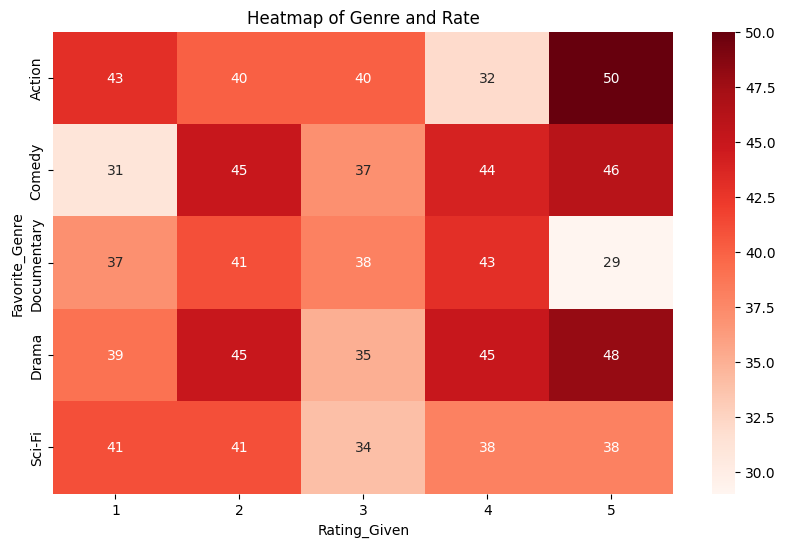

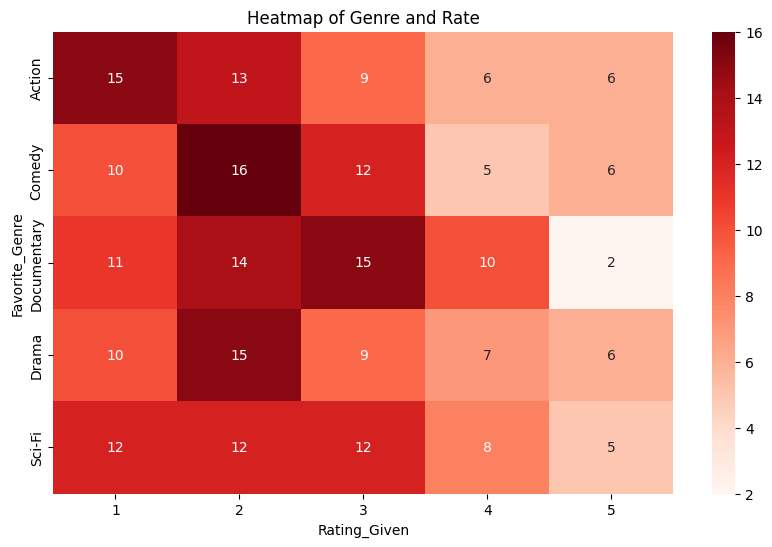

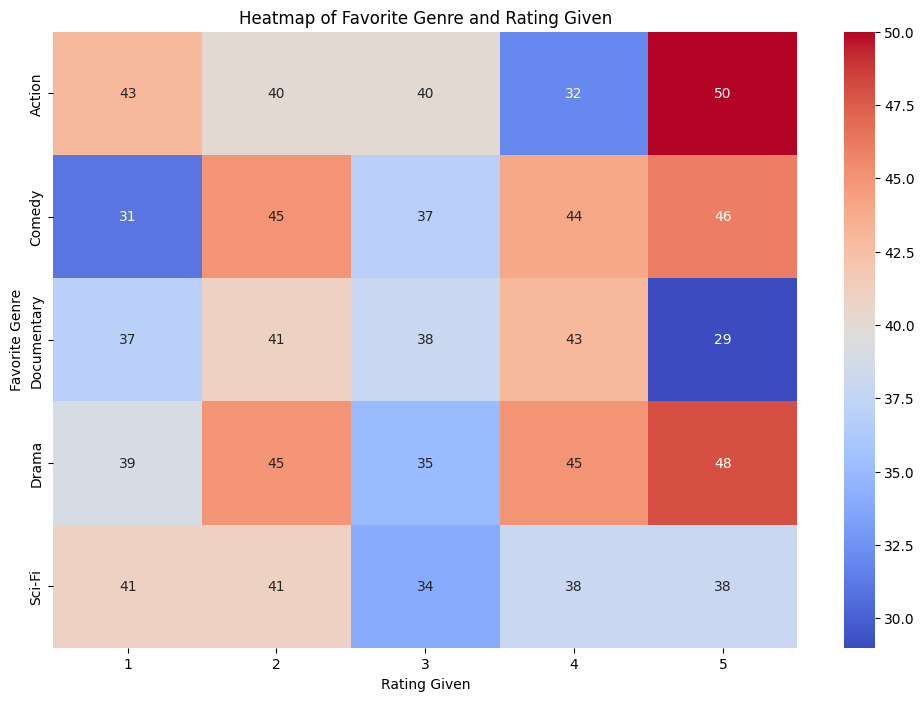

In [410]:

# 计算每个分类变量之间的频率分布
age_genre = pd.crosstab(df_clean['Age_range'], df_clean['Favorite_Genre'])
age_device = pd.crosstab(df_clean['Age_range'], df_clean['Devices_Used'])
age_location = pd.crosstab(df_clean['Age_range'], df_clean['Location'])
age_type = pd.crosstab(df_clean['Age_range'], df_clean['Subscription_Type'])

churned_data = df_clean[df_clean['Churned'] == 1] 

device_rate = pd.crosstab(df_clean['Devices_Used'], df_clean['Rating_Given'])
device_rate_c = pd.crosstab(churned_data['Devices_Used'], churned_data['Rating_Given'])

# Favorite_Genre vs rate
genre_rate = pd.crosstab(df_clean['Favorite_Genre'], df_clean['Rating_Given'])
genre_rate_c = pd.crosstab(churned_data['Favorite_Genre'], churned_data['Rating_Given'])

# 绘制热力图
plt.figure(figsize=(10, 6))
sns.heatmap(age_genre, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Age and Favorite Genre')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(age_device, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Age and Devices Used')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(age_location, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Age and Location')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(age_type, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Age and Subscription Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(device_rate, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Device and Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(device_rate_c, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Device and Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(genre_rate, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Genre and Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(genre_rate_c, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of Genre and Rate')
plt.show()

genre_rating_crosstab = pd.crosstab(df_clean['Favorite_Genre'], df_clean['Rating_Given'])

# 可视化热力图
plt.figure(figsize=(12, 8))
sns.heatmap(genre_rating_crosstab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Favorite Genre and Rating Given')
plt.xlabel('Rating Given')
plt.ylabel('Favorite Genre')
plt.show()

In [411]:
df_clean.head()

,User_ID,Age,Location,Subscription_Type,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Subscription_Months,Total_Hours_Watched,Total_Visits,Average_Monthly_Visits,Age_range
0,1,56,Central,Premium,31.513153,Action,PC,1.195762,5,0,NaN,NaN,48,1512.631330,1264.993488,26.354031,50-60
1,2,69,West,Standard,4.982277,Drama,PC,0.809002,1,0,NaN,NaN,3,14.946832,18.475650,6.158550,60-70
2,3,46,North,Standard,4.114953,Sci-Fi,Tablet,1.153570,2,0,NaN,NaN,20,82.299050,71.342931,3.567147,40-50
3,4,32,East,Standard,60.244820,Action,TV,0.609503,1,0,NaN,NaN,29,1747.099777,2866.434936,98.842584,30-40
4,5,60,North,Standard,4.711855,Sci-Fi,Mobile,0.359971,4,0,NaN,NaN,51,240.304614,667.566283,13.089535,60-70


## 看看用户流失是否跟订阅类型有关？
结论：关系不大

  Subscription_Type  Total_Count  Churn_Count  Churn_Rate
0          Standard          530          124   23.396226
1             Basic          276           73   26.449275
2           Premium          194           49   25.257732


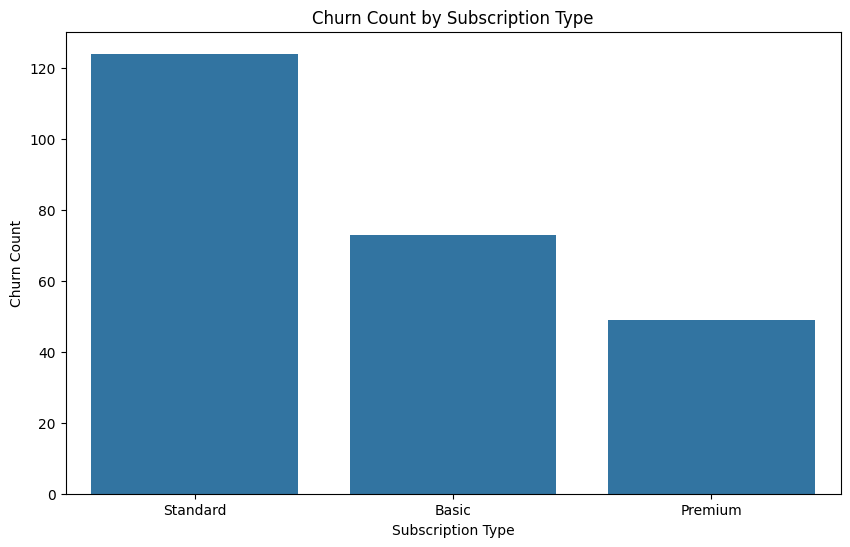

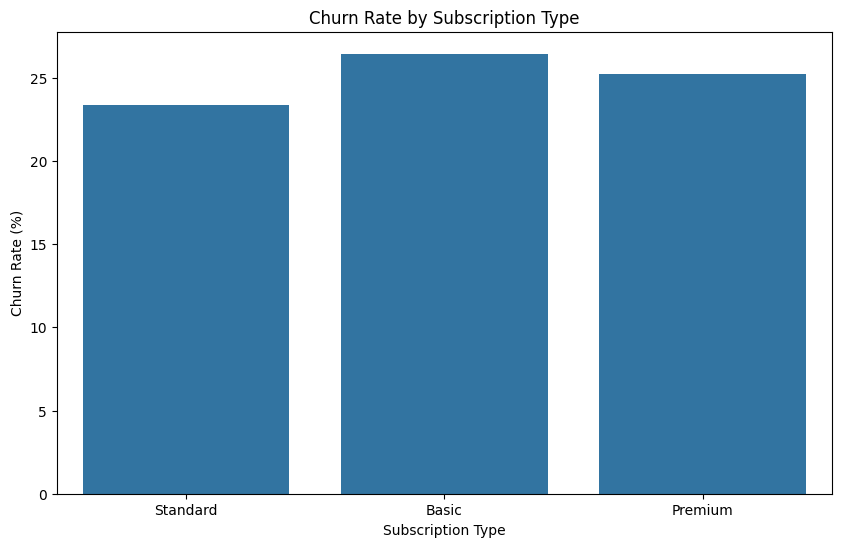

In [412]:
# 计算每个订阅类型的总数和流失用户数量
subscription_counts = df_clean['Subscription_Type'].value_counts()
churn_counts = df_clean[df_clean['Churned'] == 1]['Subscription_Type'].value_counts()

# 确保 churn_counts 中包含所有的订阅类型
churn_counts = churn_counts.reindex(subscription_counts.index, fill_value=0)

# 转换为 DataFrame 方便展示
churn_counts_df = churn_counts.reset_index()
churn_counts_df.columns = ['Subscription_Type', 'Churn_Count']

total_counts_df = subscription_counts.reset_index()
total_counts_df.columns = ['Subscription_Type', 'Total_Count']

combined_df = pd.merge(total_counts_df, churn_counts_df, on='Subscription_Type')
combined_df['Churn_Rate'] = (combined_df['Churn_Count'] / combined_df['Total_Count']) * 100

print(combined_df)


# 可视化退订用户数量
plt.figure(figsize=(10, 6))
sns.barplot(x='Subscription_Type', y='Churn_Count', data=combined_df)
plt.title('Churn Count by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Count')
plt.show()

# 可视化退订率
plt.figure(figsize=(10, 6))
sns.barplot(x='Subscription_Type', y='Churn_Rate', data=combined_df)
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate (%)')
plt.show()


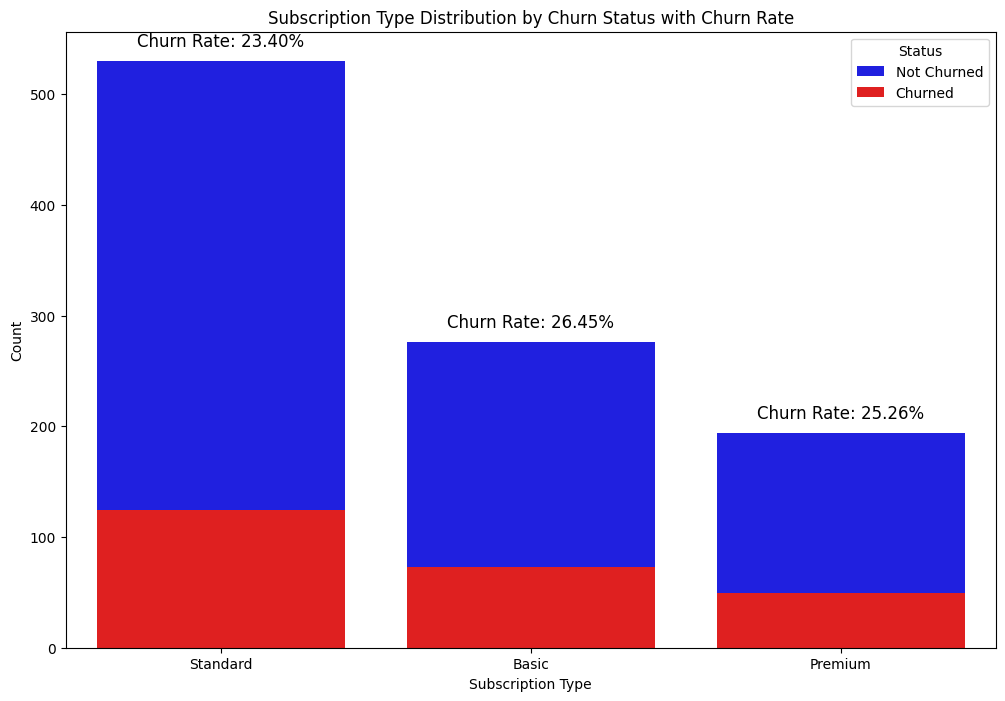

In [413]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Subscription_Type', y='Total_Count', data=combined_df, color='blue', label='Not Churned')
sns.barplot(x='Subscription_Type', y='Churn_Count', data=combined_df, color='red', label='Churned')

# 标注每种类型的流失率
for index, row in combined_df.iterrows():
    plt.text(x=index, y=row['Total_Count'] + 10, 
             s=f"Churn Rate: {row['Churn_Rate']:.2f}%", 
             ha='center', va='bottom', fontsize=12, color='black')

plt.title('Subscription Type Distribution by Churn Status with Churn Rate')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

In [414]:
import scipy.stats as stats

# 创建一个列联表
contingency_table = pd.crosstab(df_clean['Subscription_Type'], df_clean['Churned'])

# 进行卡方检验
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 0.9681720741603008
P-value: 0.6162601784049657


# Subscription_Months 和用户流失 
流失的用户的订阅月数平均值偏长，有可能是平台影片上新速度更不上导致用户流失，在接下来的分类讨论里具体分析一下，影片类型是否与这个有关系

Churned Users Subscription Months Stats:
 count    246.000000
mean      33.378049
std       17.757992
min        0.000000
25%       18.000000
50%       37.000000
75%       49.000000
max       61.000000
Name: Subscription_Months, dtype: float64

Retained Users Subscription Months Stats:
 count    754.000000
mean      31.933687
std       17.963172
min        0.000000
25%       16.000000
50%       32.000000
75%       48.000000
max       61.000000
Name: Subscription_Months, dtype: float64


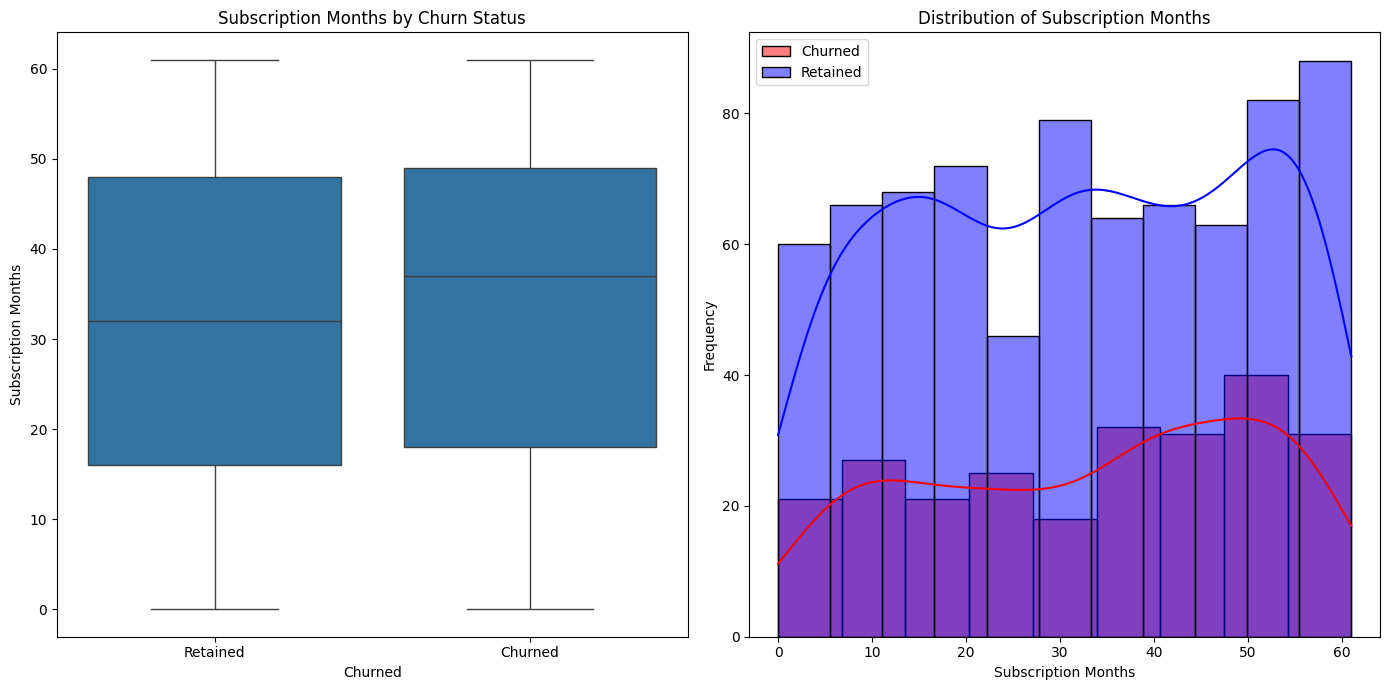

In [415]:
# 描述性统计
churned_stats = churned_users['Subscription_Months'].describe()
retained_stats = retained_users['Subscription_Months'].describe()

print("Churned Users Subscription Months Stats:\n", churned_stats)
print("\nRetained Users Subscription Months Stats:\n", retained_stats)

# 可视化分析
plt.figure(figsize=(14, 7))

# 箱线图
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='Churned', y='Subscription_Months')
plt.title('Subscription Months by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Subscription Months')
plt.xticks([0, 1], ['Retained', 'Churned'])

# 直方图
plt.subplot(1, 2, 2)
sns.histplot(churned_users['Subscription_Months'], kde=True, color='red', label='Churned')
sns.histplot(retained_users['Subscription_Months'], kde=True, color='blue', label='Retained')
plt.title('Distribution of Subscription Months')
plt.xlabel('Subscription Months')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Devices_Used和用户流失的关系
结论：mobile的流失高于其他的，有可能是手机端做的不好，建议优化手机端

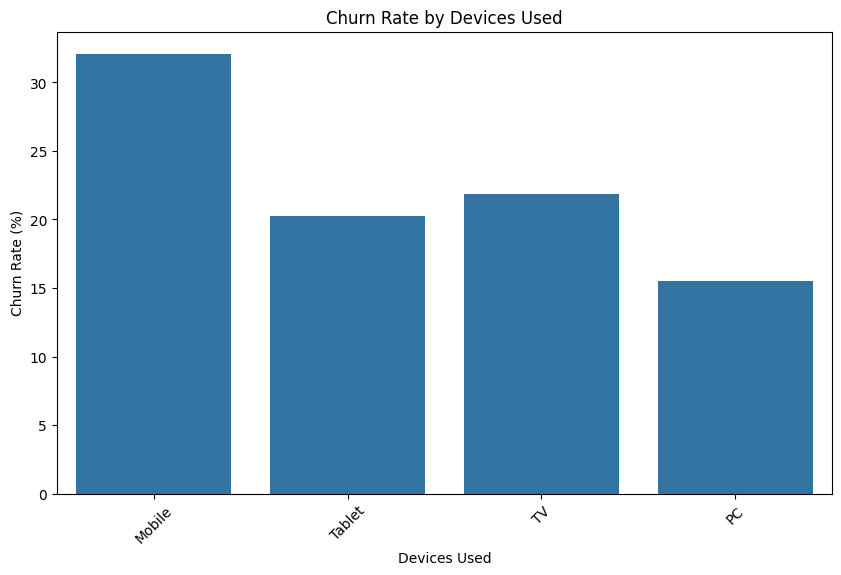

  Devices_Used  Churn_Rate
0       Mobile   32.107843
1       Tablet   20.276498
2           TV   21.890547
3           PC   15.517241


In [416]:
# 统计每个设备的用户总数和流失用户数
device_counts = df_clean['Devices_Used'].value_counts()
churned_device_counts = df_clean[df_clean['Churned'] == 1]['Devices_Used'].value_counts()

# 计算每个设备的流失率
device_churn_rate = (churned_device_counts / device_counts) * 100

# 转换为DataFrame方便展示
device_churn_rate_df = device_churn_rate.reset_index()
device_churn_rate_df.columns = ['Devices_Used', 'Churn_Rate']

# 可视化流失率
plt.figure(figsize=(10, 6))
sns.barplot(x='Devices_Used', y='Churn_Rate', data=device_churn_rate_df)
plt.title('Churn Rate by Devices Used')
plt.xlabel('Devices Used')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

# 显示流失率数据
print(device_churn_rate_df)

# Favorite_Genre 和用户流失关系

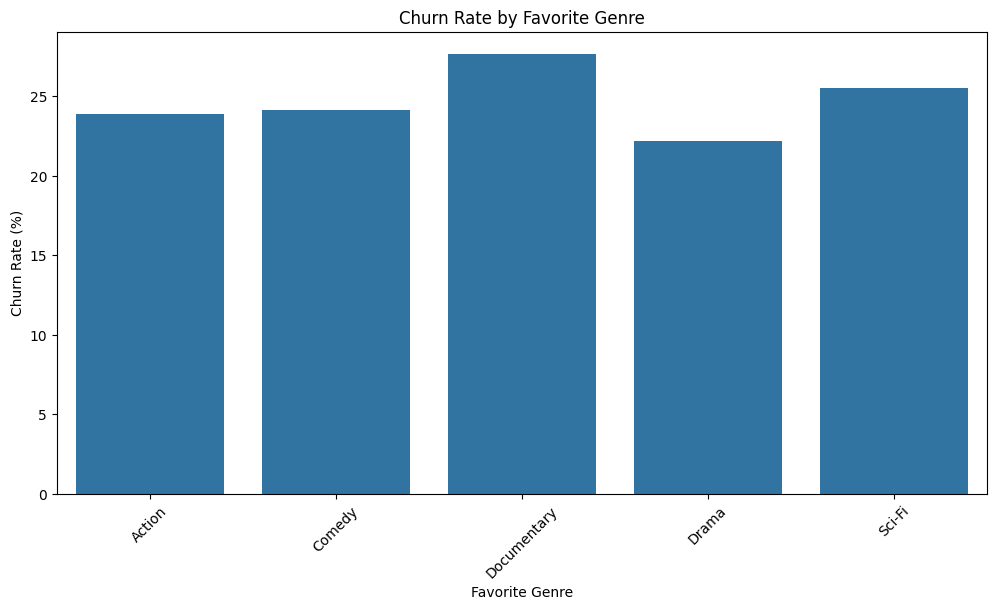

  Favorite_Genre  Churn_Rate
0         Action   23.902439
1         Comedy   24.137931
2    Documentary   27.659574
3          Drama   22.169811
4         Sci-Fi   25.520833


In [417]:
# 统计每个类型的用户总数和流失用户数
genre_counts = df_clean['Favorite_Genre'].value_counts()
churned_genre_counts = df_clean[df_clean['Churned'] == 1]['Favorite_Genre'].value_counts()

# 计算每个类型的流失率
genre_churn_rate = (churned_genre_counts / genre_counts) * 100

# 转换为DataFrame方便展示
genre_churn_rate_df = genre_churn_rate.reset_index()
genre_churn_rate_df.columns = ['Favorite_Genre', 'Churn_Rate']

# 可视化流失率
plt.figure(figsize=(12, 6))
sns.barplot(x='Favorite_Genre', y='Churn_Rate', data=genre_churn_rate_df)
plt.title('Churn Rate by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

# 显示流失率数据
print(genre_churn_rate_df)

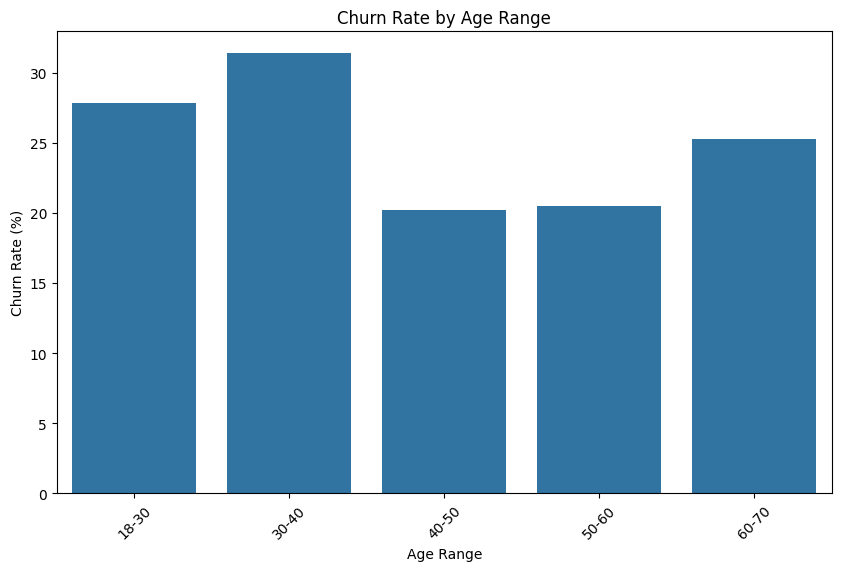

  Age_range  Churn_Rate
0     18-30   27.853881
1     30-40   31.360947
2     40-50   20.192308
3     50-60   20.512821
4     60-70   25.268817


In [418]:
# 统计每个年龄范围的用户总数和流失用户数
age_range_counts = df_clean['Age_range'].value_counts()
churned_age_range_counts = df_clean[df_clean['Churned'] == 1]['Age_range'].value_counts()

# 计算每个年龄范围的流失率
age_range_churn_rate = (churned_age_range_counts / age_range_counts) * 100

# 转换为DataFrame方便展示
age_range_churn_rate_df = age_range_churn_rate.reset_index()
age_range_churn_rate_df.columns = ['Age_range', 'Churn_Rate']

# 可视化流失率
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_range', y='Churn_Rate', data=age_range_churn_rate_df)
plt.title('Churn Rate by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

# 显示流失率数据
print(age_range_churn_rate_df)

特征与退订之间的相关性：
 Churned                   1.000000
Average_Session_Length    0.008055
Favorite_Genre            0.003580
Total_Hours_Watched      -0.024851
Average_Monthly_Visits   -0.025132
Subscription_Type        -0.030966
Age                      -0.045139
Monthly_Hours_Watched    -0.060233
Devices_Used             -0.106655
Name: Churned, dtype: float64


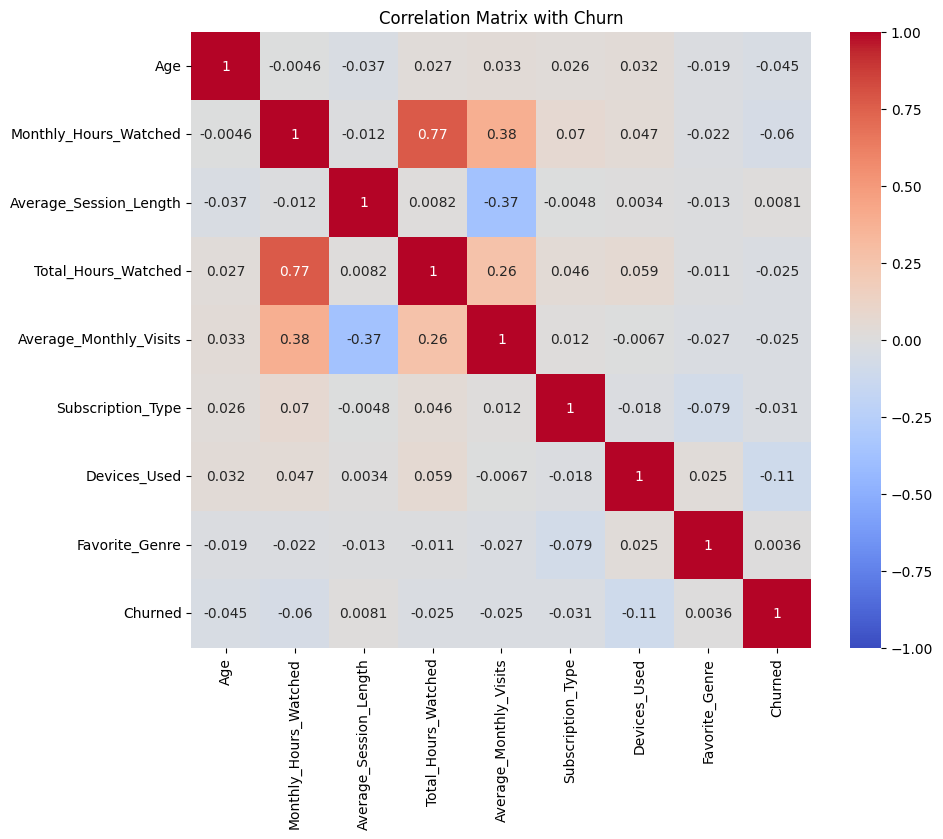

In [419]:
# 将分类特征编码为数值特征
df_clean['Subscription_Type'] = df_clean['Subscription_Type'].astype('category').cat.codes
df_clean['Devices_Used'] = df_clean['Devices_Used'].astype('category').cat.codes
df_clean['Favorite_Genre'] = df_clean['Favorite_Genre'].astype('category').cat.codes

# 选择数值型特征
numeric_features = ['Age', 'Monthly_Hours_Watched', 'Average_Session_Length', 'Total_Hours_Watched', 'Average_Monthly_Visits', 'Subscription_Type', 'Devices_Used', 'Favorite_Genre']

# 计算特征与退订之间的相关性
correlation_matrix = df_clean[numeric_features + ['Churned']].corr()

# 打印特征与退订之间的相关性
churn_correlation = correlation_matrix['Churned'].sort_values(ascending=False)
print("特征与退订之间的相关性：\n", churn_correlation)

# 可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Churn')
plt.show()

In [420]:
# 选择特征和目标变量
X = df_clean[['Age', 'Subscription_Type', 'Monthly_Hours_Watched', 'Average_Session_Length', 'Total_Hours_Watched', 'Average_Monthly_Visits', 'Devices_Used', 'Favorite_Genre']]
y = df_clean['Churned']

# 添加常数项
X = np.c_[np.ones(X.shape[0]), X]

# 初始化参数
theta = np.zeros(X.shape[1])

# 定义逻辑回归模型
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # 避免log(0)
    cost = -(1/m) * (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon)))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        theta = theta - (learning_rate / m) * np.dot(X.T, sigmoid(np.dot(X, theta)) - y)
        cost_history.append(cost_function(X, y, theta))
    return theta, cost_history

# 训练逻辑回归模型
learning_rate = 0.01
iterations = 10000
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# 打印训练后的参数
print("Theta:", theta)

# 计算标准误差
h = sigmoid(np.dot(X, theta))
diag = h * (1 - h)
var_covar_matrix = np.linalg.inv(np.dot(X.T, X * diag[:, np.newaxis]))
standard_errors = np.sqrt(np.diag(var_covar_matrix))

# 计算z值
z_scores = theta / standard_errors

# 计算p值
p_values = [2 * (1 - norm.cdf(np.abs(z))) for z in z_scores]

# 打印特征的p值
features = ['Intercept'] + df_clean.columns[1:len(z_scores)].tolist()
p_value_df = pd.DataFrame({'Feature': features, 'p-value': p_values})
print(p_value_df)




/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel

Theta: [ 0.81143211  0.06775918 -0.06035086 -1.96313751  1.49899542 -0.06111813
  0.03883701 -3.78936036  1.69981095]
                  Feature       p-value
0               Intercept  5.341699e-01
1                     Age  3.881286e-03
2                Location  8.774359e-01
3       Subscription_Type  1.134334e-08
4   Monthly_Hours_Watched  1.565483e-06
5          Favorite_Genre  2.161933e-05
6            Devices_Used  5.049473e-03
7  Average_Session_Length  3.038369e-08
8            Rating_Given  1.837375e-07


/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_67996/4056884272.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel

# 分类讨论

注意：这里personal reason最好加入每一个类型再讨论一次，因为有可能是别人不想填原因，或是多个原因。

In [421]:
# View the reasons why users unsubscribed
churned_users = df_clean[df_clean['Churned'] == 1]
churned_reasons = churned_users['Reason_for_Churn'].value_counts()
print(churned_reasons)

Reason_for_Churn
Price increase               68
Found better service         64
Personal reasons             62
Dissatisfied with content    52
Name: count, dtype: int64


# Price increase analyse

In [422]:
# Churned reason for "Price increase" with Subscription Type
price_increase_churn = df[(df_clean['Churned'] == 1) & (df['Reason_for_Churn'] == 'Price increase')]
price_increase_subscription_types = price_increase_churn['Subscription_Type'].value_counts()
print(price_increase_subscription_types)

Subscription_Type
Standard    35
Premium     18
Basic       15
Name: count, dtype: int64


In [423]:
# Churned reason for "Price increase" with Subscription Type
price_increase_personal_reason_churn = df_clean[(df_clean['Churned'] == 1) & ((df_clean['Reason_for_Churn'] == 'Price increase')| (df_clean['Reason_for_Churn'] == 'Personal reasons'))]
price_increase_personal_reason_subscription_types = price_increase_personal_reason_churn['Subscription_Type'].value_counts()
print(price_increase_personal_reason_subscription_types)

Subscription_Type
2    64
0    36
1    30
Name: count, dtype: int64


# found better service analyse

In [424]:
# Churned reason for "better service" with tablet
better_service_churn = df[(df_clean['Churned'] == 1) & (df['Reason_for_Churn'] == 'Found better service')]
better_service_devices = better_service_churn['Devices_Used'].value_counts()
print(better_service_devices)

Devices_Used
Mobile    35
Tablet    13
TV        11
PC         5
Name: count, dtype: int64


In [425]:
# Churned reason for "better service" with Subscription Type
better_service_subscription_types =better_service_churn['Subscription_Type'].value_counts()
print(better_service_subscription_types)

Subscription_Type
Standard    37
Basic       16
Premium     11
Name: count, dtype: int64


# Dissatisfied with content analyse

In [426]:
# Churned reason for "Dissatisfied" with Favorite_Genre
dissatisfied_churn = df[(df_clean['Churned'] == 1) & (df['Reason_for_Churn'] == 'Dissatisfied with content')]
dissatisfied_favorite_genre	 = dissatisfied_churn['Favorite_Genre'].value_counts()
print(dissatisfied_favorite_genre)

Favorite_Genre
Sci-Fi         13
Action         12
Drama          11
Comedy         11
Documentary     5
Name: count, dtype: int64


In [427]:

df[['Favorite_Genre','Rating_Given']].sort_values('Rating_Given', ascending=True)

,Favorite_Genre,Rating_Given
455,Drama,1
695,Sci-Fi,1
158,Action,1
159,Action,1
356,Drama,1
...,...,...
843,Drama,5
844,Documentary,5
287,Drama,5
722,Sci-Fi,5


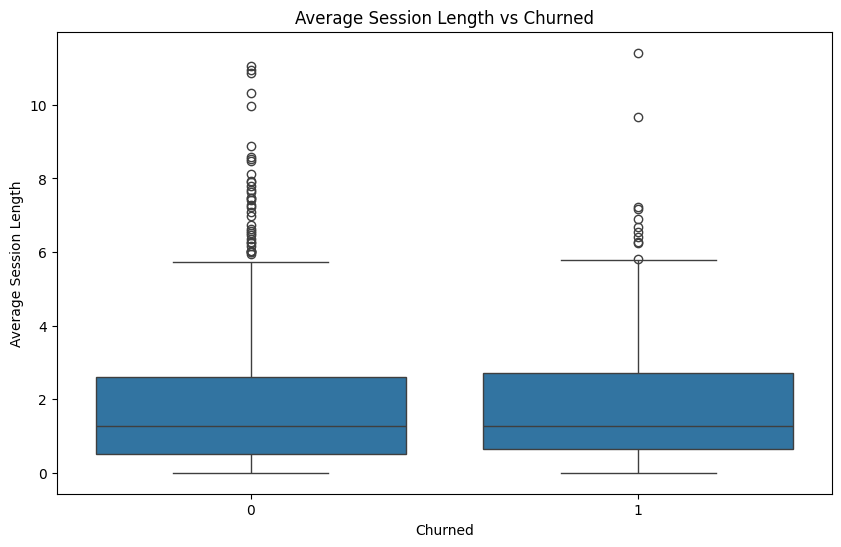

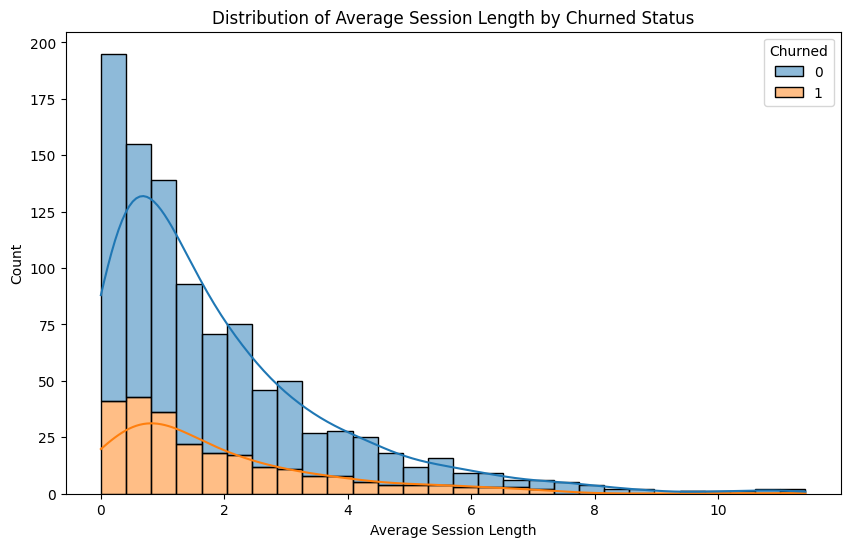

In [428]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churned', y='Average_Session_Length')
plt.title('Average Session Length vs Churned')
plt.xlabel('Churned')
plt.ylabel('Average Session Length')
plt.show()

#Visualize the distribution of session length between churned and unchurned users
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Average_Session_Length', hue='Churned', kde=True, multiple='stack')
plt.title('Distribution of Average Session Length by Churned Status')
plt.xlabel('Average Session Length')
plt.ylabel('Count')
plt.show()